# Finding the Energy Levels of a Cubic Half-Potential  
In this notebook, we will use the integration tools developed in our test notebook to find the first four energy levels of a cubic half-potential.

We define the potential as the following:  
$ V(x) = \alpha x^3$, when $x > 0$  
$ V =$ infinity, when $ x < 0 $  
We will also set $\alpha = 5 \frac{eV}{angstrom^3}$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

0.0


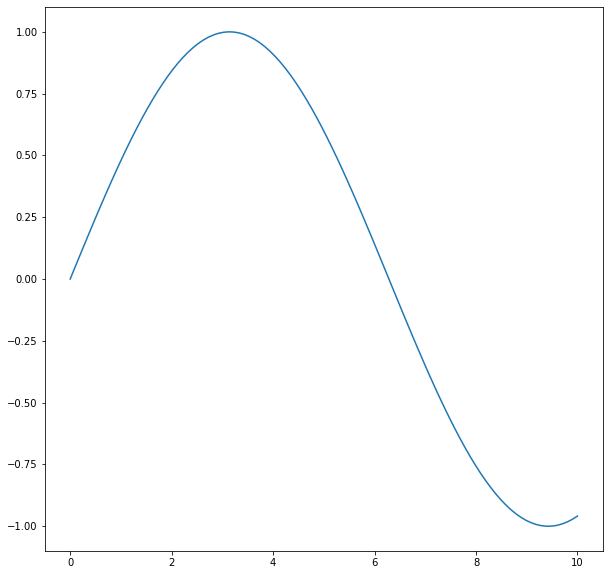

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.linspace(0,10,100)

line1 = ax.plot(x, np.sin(x))[0]

for phase in np.linspace(0,10*np.pi,100):
    if phase % 10 ==0:
        print(phase)
    line1.set_ydata(np.sin(0.5*x+phase))